In [24]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

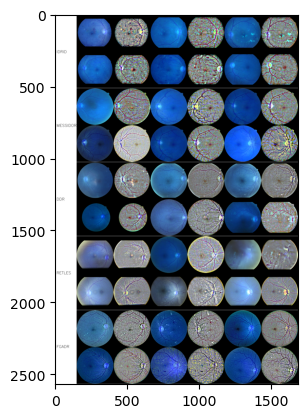

In [69]:
files = ['IDRID', 'MESSIDOR', 'DDR', 'RETINAL_LESIONS', 'FGADR']

imgs = [cv2.resize(cv2.imread(f+'.png'), (0,0), fx=0.5, fy=0.5) for f in files]
img_shape = imgs[0].shape
imgs = [img[:2*img_shape[0]//3] for img in imgs]
hrow, wrow, c = imgs[0].shape

imgs = [np.pad(img, ((1, 1), (0,0), (0,0)), constant_values=200) for img in imgs]
stack = np.vstack(imgs)

stack_margin = np.pad(stack, ((0, 0), (150,0), (0,0)), constant_values=255)

h, w, c = stack_margin.shape

for i, f in enumerate(files):
    font = cv2.FONT_HERSHEY_SIMPLEX
    fontScale = .9
    color = (0, 0, 0)
    thickness = 1
    org = (10, hrow*i + hrow//2 + 15 ) 
    stack_margin = cv2.putText(stack_margin, f.replace('RETINAL_LESIONS', 'RETLES'), org, font, fontScale, 
                 color, thickness, cv2.LINE_AA, False)
    
    
cv2.imwrite('preprocessing_stack.png', stack_margin)
plt.imshow(stack_margin)
plt.show()